,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1849-01-01,26.704,1.435,CÃ´te D'Ivoire
1,1849-02-01,27.434,1.362,CÃ´te D'Ivoire
2,1849-03-01,28.101,1.612,CÃ´te D'Ivoire
3,1849-04-01,26.140,1.387,CÃ´te D'Ivoire
4,1849-05-01,25.427,1.200,CÃ´te D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
613,1900-02-01,27.816,0.789,CÃ´te D'Ivoire
614,1900-03-01,28.395,1.296,CÃ´te D'Ivoire
615,1900-04-01,27.706,0.501,CÃ´te D'Ivoire
616,1900-05-01,26.753,0.458,CÃ´te D'Ivoire
617,1900-06-01,25.180,0.733,CÃ´te D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
5191,1900-02-01,22.210,0.720,India
5192,1900-03-01,27.790,0.660,India
5193,1900-04-01,30.873,0.646,India
5194,1900-05-01,32.646,0.557,India
5195,1900-06-01,33.192,0.372,India
...,...,...,...,...
216560,2013-05-01,32.980,1.097,India
216561,2013-06-01,29.418,0.527,India
216562,2013-07-01,27.306,0.257,India
216563,2013-08-01,27.187,0.129,India


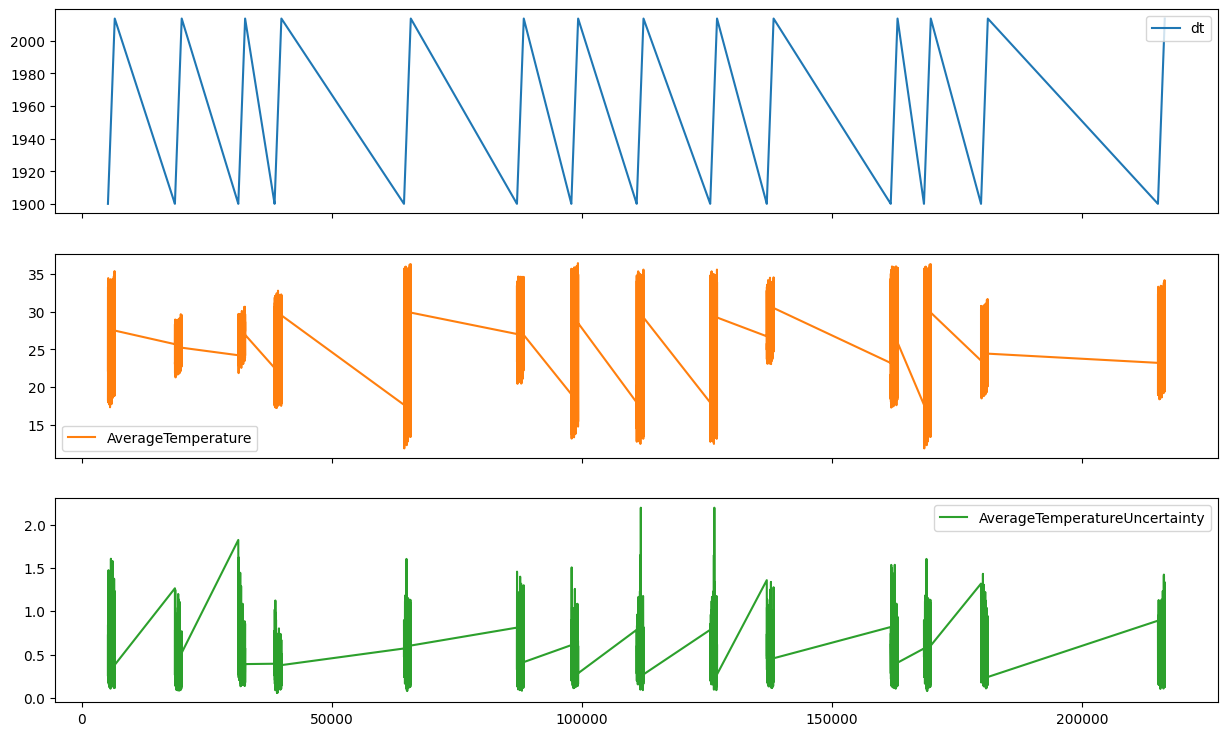

Total Data Train :  15265
Total Data Validation :  3817


2.4628999999999994
Epoch 1/100
77/77 [==============================] - 141s 1s/step - loss: 7.3143 - mae: 7.7975 - val_loss: 5.2045 - val_mae: 5.6824
Epoch 2/100
77/77 [==============================] - 103s 1s/step - loss: 2.9915 - mae: 3.4573 - val_loss: 11.0848 - val_mae: 11.5848
Epoch 3/100
77/77 [==============================] - 112s 1s/step - loss: 2.6208 - mae: 3.0847 - val_loss: 2.9889 - val_mae: 3.4748
Epoch 4/100
77/77 [==============================] - 112s 1s/step - loss: 1.4563 - mae: 1.9029 - val_loss: 10.6247 - val_mae: 11.1247
Epoch 5/100
77/77 [==============================] - 112s 1s/step - loss: 2.4243 - mae: 2.8878 - val_loss: 1.0799 - val_mae: 1.5153
Epoch 6/100
77/77 [==============================] - 112s 1s/step - loss: 1.0210 - mae: 1.4464 - val_loss: 3.5315 - val_mae: 4.0250
Epoch 7/100
77/77 [==============================] - ETA: 0s - loss: 1.5642 - mae: 2.0125
MAE dari model < 10% skala data
77/77 [==============================] - 112s 1s/step - loss: 1

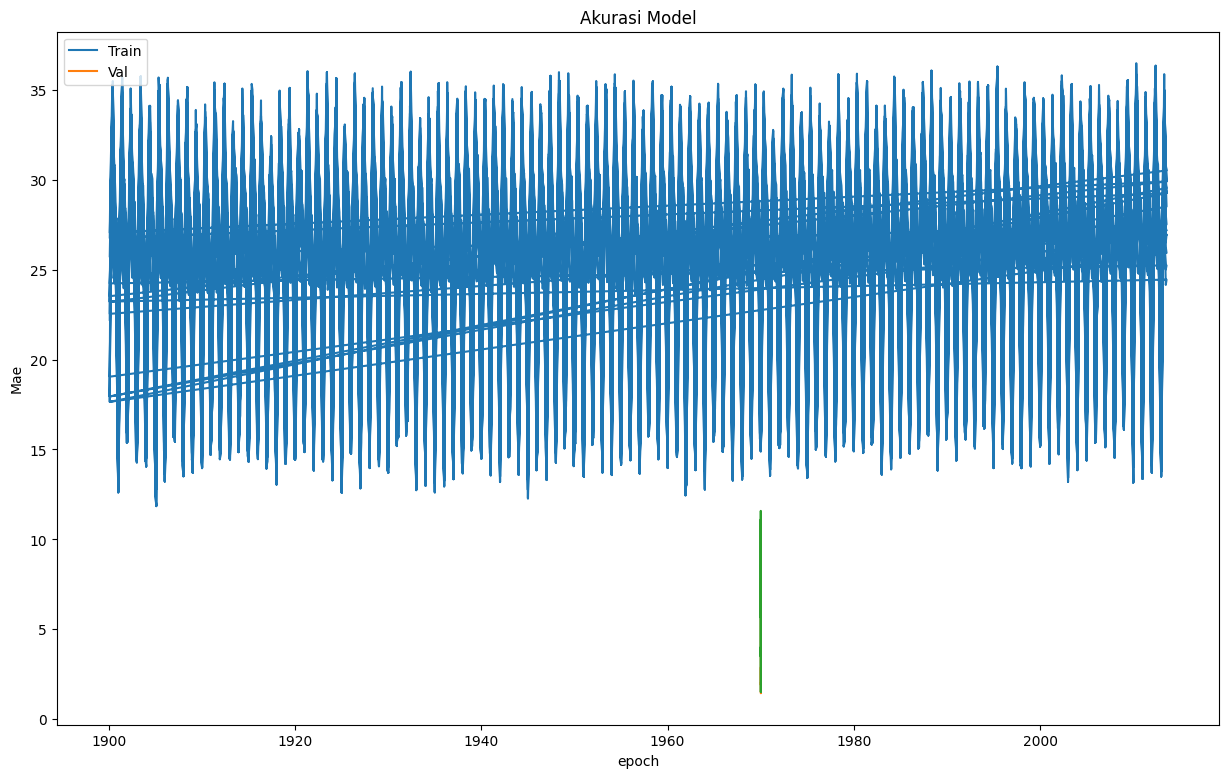

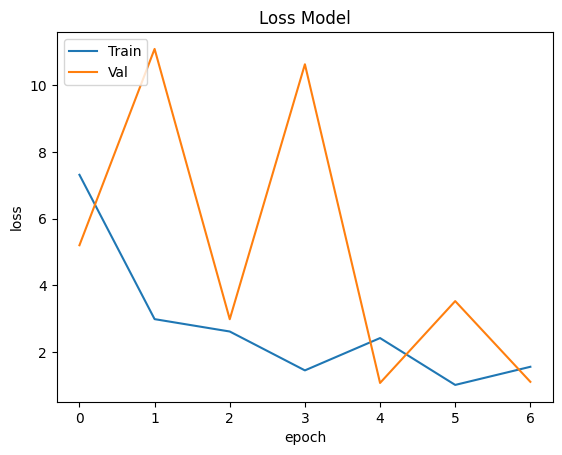

In [1]:

# u/ dataframe
import pandas as pd
import numpy as np

# u/ split data
from sklearn.model_selection import train_test_split

# u/ preprocessing dan layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

# u/ visualisasi plot
import matplotlib.pyplot as plt

df = pd.read_csv('https://query.data.world/s/tu7xkafdc4jbuzmuh5zxqaeshwj7sv', encoding= 'unicode_escape')
df.head()

df.drop(['City','Latitude','Longitude'], axis=1, inplace=True)
display(df)

df['dt'] = pd.to_datetime(df['dt'])  
get_data = (df['dt'] > '1900-01-01') & (df['dt'] <= '2013-09-01')
df.loc[get_data]

df = df.loc[get_data]
display(df)

df = df.loc[df['Country'].isin(['India'])]
display(df)

df.drop(['Country'], axis=1, inplace=True)
df.reset_index(drop=True)

df.isnull().sum()

df.dropna(subset=['AverageTemperature'],inplace=True)
df.dropna(subset=['AverageTemperatureUncertainty'],inplace=True)
df.isnull().sum()

df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots=True, figsize=(15, 9))
plt.show()

dates = df['dt'].values
temp = df['AverageTemperature'].values

dates = np.array(dates)
temp = np.array(temp)

plt.figure(figsize=(15,9))
plt.plot(dates, temp)

plt.title('Average Temperature', fontsize = 20)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

df.dtypes

x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size=0.8, test_size = 0.2, shuffle = False )

print('Total Data Train : ',len(x_train))
print('Total Data Validation : ',len(x_valid))

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)

model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

Mae = (df['AverageTemperature'].max() - df['AverageTemperature'].min()) * 10/100
print(Mae)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<2.4 and logs.get('val_mae')<2.4):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=100, validation_data = val_set, callbacks=[callbacks])

# Plot Accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()